In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

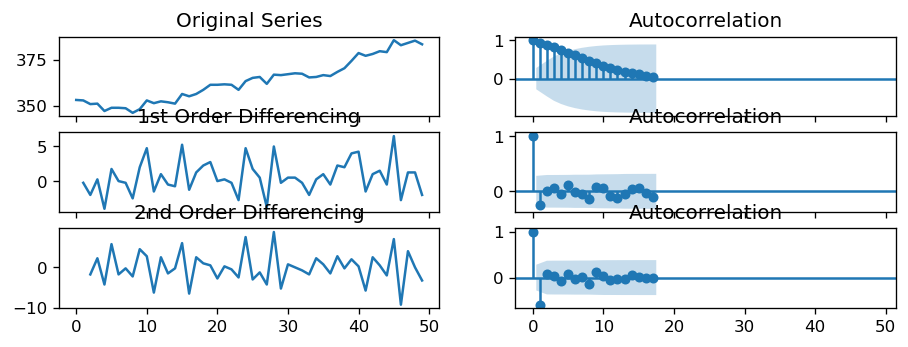

In [19]:
# Import data
# 'data' is placeholder
df = pd.read_csv('CornFutures_ZC_CBT.csv')
df = df.head(50)
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [20]:
# Use Adfuller test
result = adfuller(df.Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.516313
p-value: 0.985361


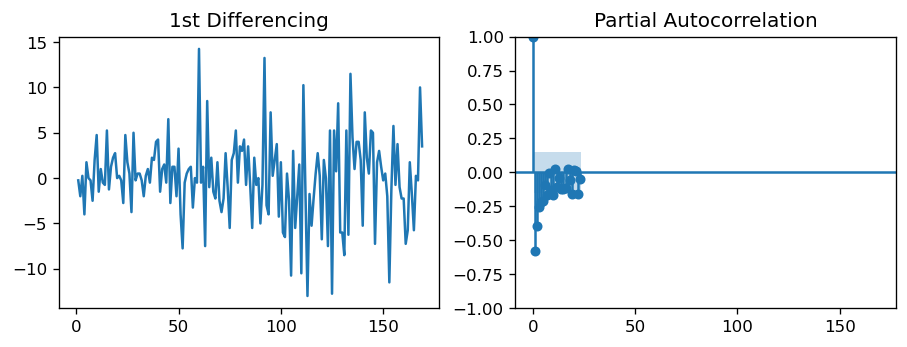

In [70]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,1))
plot_pacf(df.Close.diff().diff().dropna(), ax=axes[1])

plt.show()

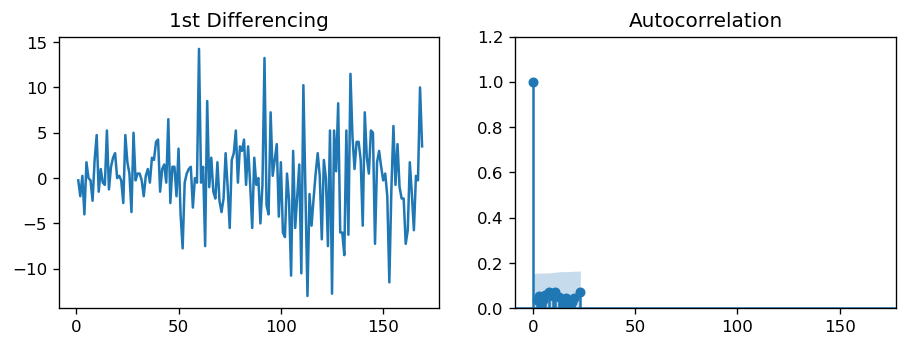

In [59]:
# ACF plot of 1st differenced series
# Import data
df = pd.read_csv('CornFutures_ZC_CBT.csv')
df =df.head(170)
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Close.diff().dropna(), ax=axes[1])

plt.show()

In [60]:
# 1,1,2 ARIMA Model
model = ARIMA(df.Close, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  169
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -490.664
Method:                       css-mle   S.D. of innovations              4.412
Date:                Fri, 24 Feb 2023   AIC                            993.329
Time:                        22:14:20   BIC                           1012.108
Sample:                             1   HQIC                          1000.950
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0130      0.363      0.036      0.971      -0.698       0.724
ar.L1.D.Close     0.8472      0.604      1.403      0.161      -0.337       2.031
ar.L2.D.Close    -0.1119      0.571     

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


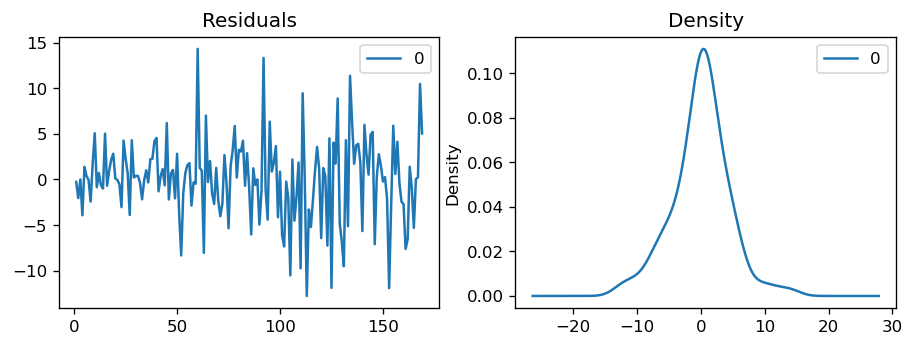

In [61]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

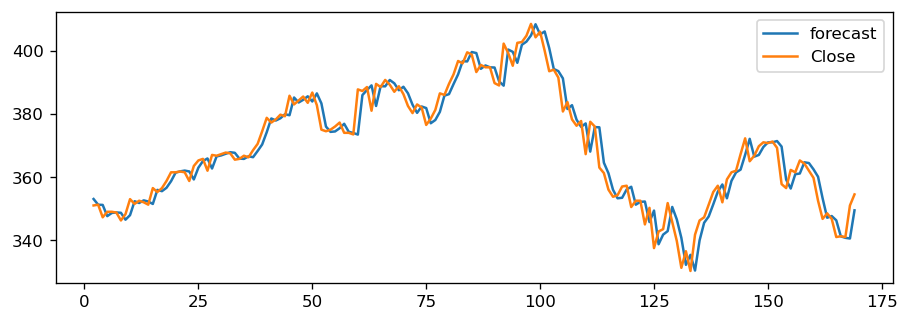

In [62]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [63]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Close[:155]
test = df.Close[155:]

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


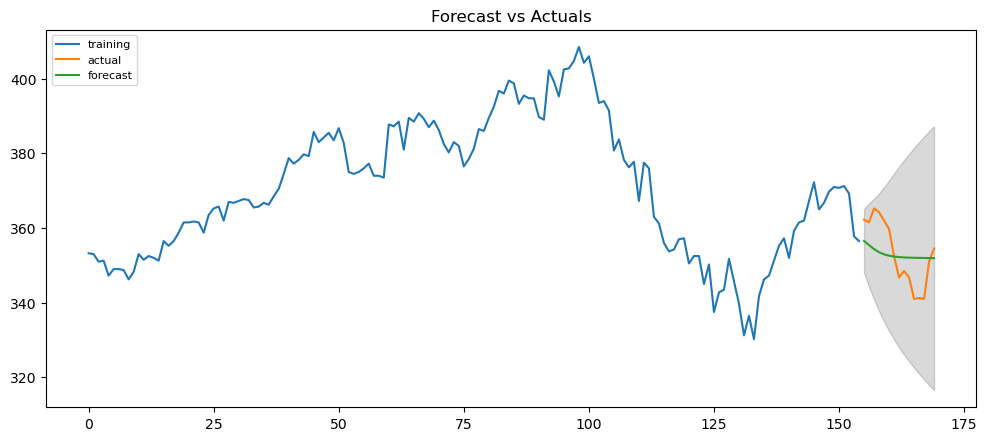

In [64]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2,1,2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()